# AI Community @ Семинар № 8
## Поиск фигур на изображении

In [7]:
import cv2
import imutils
import numpy as np
from skimage.io import imshow
from matplotlib import pyplot as plt

%matplotlib inline

In [16]:
class ShapeDetector:
    """
    Class which detects shapes given contour.
    """
    
    def detect(self, c):
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        if len(approx) == 3:
            shape = "triangle"
        elif len(approx) == 4:
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        else:
            shape = "circle"
        return shape

OpenCV загружает изображения в формате BGR.  
Превратим BGR в RGB и уменьшим изображение:

In [55]:
image = cv2.imread("./images/shapes.jpg")[:, :, ::-1]
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

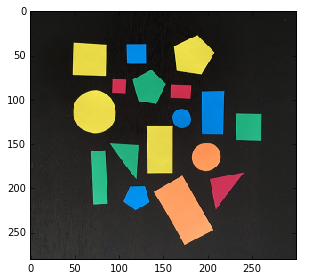

In [56]:
imshow(resized);

Для поиска контуров нужно бинаризованное изображение.  
Сначала переведем изображение в оттенки серого:

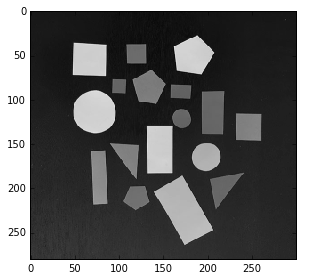

In [57]:
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
imshow(gray);

Затем бинаризуем:

In [58]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

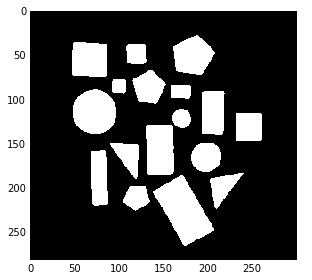

In [59]:
imshow(thresh)

Найдем контуры:

In [60]:
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if imutils.is_cv2() else contours[1]

Определим тип каждого объекта по его контуру.  
Для этого используем наш класс `ShapeDetector`:

In [61]:
sd = ShapeDetector()
for contour in contours:
    M = cv2.moments(contour)
    cX = int((M["m10"] / M["m00"]))
    cY = int((M["m01"] / M["m00"]))
    shape = sd.detect(contour)

    contour = contour.astype("int")
    cv2.drawContours(resized, [contour], -1, (0, 255, 0), 2)
    cv2.putText(resized, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

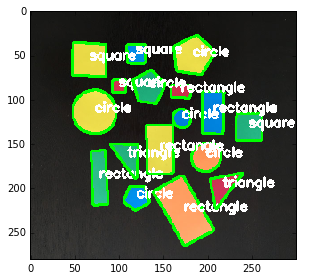

In [62]:
imshow(resized);